In [4]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.linear_model import Ridge
import numpy as np

##########데이터 로드

train_df = pd.read_excel('https://github.com/cranberryai/todak_todak_python/blob/master/machine_learning/regression/carprice_E1SUl6b.xlsx?raw=true', sheet_name='train')
test_df = pd.read_excel('https://github.com/cranberryai/todak_todak_python/blob/master/machine_learning/regression/carprice_E1SUl6b.xlsx?raw=true', sheet_name='test')

In [5]:
df = pd.concat([train_df,test_df],axis=0)
df

,가격,년식,종류,연비,마력,토크,연료,하이브리드,배기량,중량,변속기
0,1885,2015,준중형,11.8,172,21.0,가솔린,0,1999,1300,자동
1,2190,2015,준중형,12.3,204,27.0,가솔린,0,1591,1300,자동
2,1135,2015,소형,15.0,100,13.6,가솔린,0,1368,1035,수동
3,1645,2014,소형,14.0,140,17.0,가솔린,0,1591,1090,자동
4,1960,2015,대형,9.6,175,46.0,디젤,0,2497,1990,자동
...,...,...,...,...,...,...,...,...,...,...,...
26,6910,2015,대형,8.9,334,40.3,가솔린,0,3778,1915,자동
27,2545,2015,대형,8.7,175,46.0,디젤,0,2497,2383,수동
28,1960,2015,대형,9.6,175,46.0,디젤,0,2497,1990,자동
29,870,2010,소형,13.0,95,12.7,가솔린,0,1399,1046,자동


In [6]:
# 머신러닝에는 결측치가 있으면 안된다.

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 102 entries, 0 to 30
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   가격      102 non-null    int64  
 1   년식      102 non-null    int64  
 2   종류      102 non-null    object 
 3   연비      102 non-null    float64
 4   마력      102 non-null    int64  
 5   토크      102 non-null    float64
 6   연료      102 non-null    object 
 7   하이브리드   102 non-null    int64  
 8   배기량     102 non-null    int64  
 9   중량      102 non-null    int64  
 10  변속기     102 non-null    object 
dtypes: float64(2), int64(6), object(3)
memory usage: 9.6+ KB


In [7]:
tmp = df.isna()
tmp

,가격,년식,종류,연비,마력,토크,연료,하이브리드,배기량,중량,변속기
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
26,False,False,False,False,False,False,False,False,False,False,False
27,False,False,False,False,False,False,False,False,False,False,False
28,False,False,False,False,False,False,False,False,False,False,False
29,False,False,False,False,False,False,False,False,False,False,False


In [8]:
# 결측치 확인

tmp = df.isna().sum()
tmp

가격       0
년식       0
종류       0
연비       0
마력       0
토크       0
연료       0
하이브리드    0
배기량      0
중량       0
변속기      0
dtype: int64

c:\Users\ypd04\anaconda3\lib\site-packages\seaborn\utils.py:80: UserWarning: Glyph 44032 (\N{HANGUL SYLLABLE GA}) missing from current font.
  fig.canvas.draw()
c:\Users\ypd04\anaconda3\lib\site-packages\seaborn\utils.py:80: UserWarning: Glyph 44201 (\N{HANGUL SYLLABLE GYEOG}) missing from current font.
  fig.canvas.draw()
c:\Users\ypd04\anaconda3\lib\site-packages\seaborn\utils.py:80: UserWarning: Glyph 45380 (\N{HANGUL SYLLABLE NYEON}) missing from current font.
  fig.canvas.draw()
c:\Users\ypd04\anaconda3\lib\site-packages\seaborn\utils.py:80: UserWarning: Glyph 49885 (\N{HANGUL SYLLABLE SIG}) missing from current font.
  fig.canvas.draw()
c:\Users\ypd04\anaconda3\lib\site-packages\seaborn\utils.py:80: UserWarning: Glyph 51333 (\N{HANGUL SYLLABLE JONG}) missing from current font.
  fig.canvas.draw()
c:\Users\ypd04\anaconda3\lib\site-packages\seaborn\utils.py:80: UserWarning: Glyph 47448 (\N{HANGUL SYLLABLE RYU}) missing from current font.
  fig.canvas.draw()
c:\Users\ypd04\anaconda3

<Axes: >

c:\Users\ypd04\anaconda3\lib\site-packages\IPython\core\events.py:93: UserWarning: Glyph 44032 (\N{HANGUL SYLLABLE GA}) missing from current font.
  func(*args, **kwargs)
c:\Users\ypd04\anaconda3\lib\site-packages\IPython\core\events.py:93: UserWarning: Glyph 44201 (\N{HANGUL SYLLABLE GYEOG}) missing from current font.
  func(*args, **kwargs)
c:\Users\ypd04\anaconda3\lib\site-packages\IPython\core\events.py:93: UserWarning: Glyph 45380 (\N{HANGUL SYLLABLE NYEON}) missing from current font.
  func(*args, **kwargs)
c:\Users\ypd04\anaconda3\lib\site-packages\IPython\core\events.py:93: UserWarning: Glyph 49885 (\N{HANGUL SYLLABLE SIG}) missing from current font.
  func(*args, **kwargs)
c:\Users\ypd04\anaconda3\lib\site-packages\IPython\core\events.py:93: UserWarning: Glyph 51333 (\N{HANGUL SYLLABLE JONG}) missing from current font.
  func(*args, **kwargs)
c:\Users\ypd04\anaconda3\lib\site-packages\IPython\core\events.py:93: UserWarning: Glyph 47448 (\N{HANGUL SYLLABLE RYU}) missing from cu

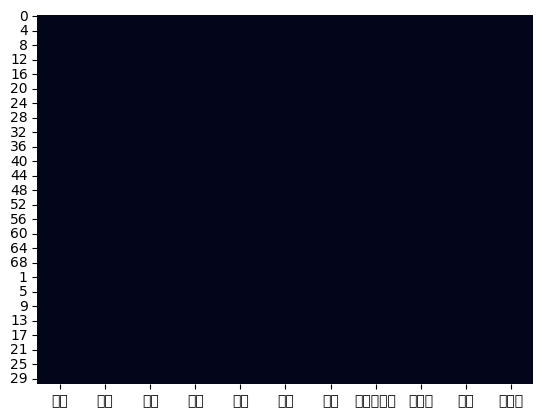

In [12]:
# 결측치 시각화
# !pip install matplotlib
# !pip install seaborn

import matplotlib.pyplot as plt
import seaborn as sns

sns.heatmap(df.isnull(),cbar=False)

In [13]:
# x,y 변수 나누고 y값에 영향을 주는 x값을 알기 위해서는 EDA를 실행해야함 (6/2 금요일 수업 자료)
# 현대 자동차 가격 예측 회귀분석

# x,y 나누기
x_data = df.drop(['가격'],axis=1)
y_data = df['가격']
x_data

,년식,종류,연비,마력,토크,연료,하이브리드,배기량,중량,변속기
0,2015,준중형,11.8,172,21.0,가솔린,0,1999,1300,자동
1,2015,준중형,12.3,204,27.0,가솔린,0,1591,1300,자동
2,2015,소형,15.0,100,13.6,가솔린,0,1368,1035,수동
3,2014,소형,14.0,140,17.0,가솔린,0,1591,1090,자동
4,2015,대형,9.6,175,46.0,디젤,0,2497,1990,자동
...,...,...,...,...,...,...,...,...,...,...
26,2015,대형,8.9,334,40.3,가솔린,0,3778,1915,자동
27,2015,대형,8.7,175,46.0,디젤,0,2497,2383,수동
28,2015,대형,9.6,175,46.0,디젤,0,2497,1990,자동
29,2010,소형,13.0,95,12.7,가솔린,0,1399,1046,자동


In [14]:
y_data

0     1885
1     2190
2     1135
3     1645
4     1960
      ... 
26    6910
27    2545
28    1960
29     870
30    2879
Name: 가격, Length: 102, dtype: int64

In [15]:
# x 데이터의 문자 형식이 어떤 자료가 있는지 확인

df.dtypes
# object 인 자료형들은 get_dummies

가격         int64
년식         int64
종류        object
연비       float64
마력         int64
토크       float64
연료        object
하이브리드      int64
배기량        int64
중량         int64
변속기       object
dtype: object

In [16]:
# ex)
xdummy = pd.get_dummies(x_data)
xdummy

,년식,연비,마력,토크,하이브리드,배기량,중량,종류_대형,종류_소형,종류_준중형,종류_중형,연료_LPG,연료_가솔린,연료_디젤,변속기_수동,변속기_자동
0,2015,11.8,172,21.0,0,1999,1300,False,False,True,False,False,True,False,False,True
1,2015,12.3,204,27.0,0,1591,1300,False,False,True,False,False,True,False,False,True
2,2015,15.0,100,13.6,0,1368,1035,False,True,False,False,False,True,False,True,False
3,2014,14.0,140,17.0,0,1591,1090,False,True,False,False,False,True,False,False,True
4,2015,9.6,175,46.0,0,2497,1990,True,False,False,False,False,False,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26,2015,8.9,334,40.3,0,3778,1915,True,False,False,False,False,True,False,False,True
27,2015,8.7,175,46.0,0,2497,2383,True,False,False,False,False,False,True,True,False
28,2015,9.6,175,46.0,0,2497,1990,True,False,False,False,False,False,True,False,True
29,2010,13.0,95,12.7,0,1399,1046,False,True,False,False,False,True,False,False,True


In [17]:
# train / test 분리
# 훈련 자료를 70%로 지정하고, 항상 같은 자료로 나눌 수 있도록 지정
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(xdummy,y_data,test_size=0.2,random_state=777)
X_train[:5], y_train[:5]

(      년식    연비   마력    토크  하이브리드   배기량    중량  종류_대형  종류_소형  종류_준중형  종류_중형  \
 17  2015  14.1  100  13.6      0  1368  1035  False   True   False  False   
 30  2015  11.3  190  24.6      0  2359  1575   True  False   False  False   
 5   2015  12.4  200  44.5      0  2199  1864  False  False   False   True   
 11  2015  11.4  200  20.9      0  2199  1864  False  False   False   True   
 3   2014  14.0  140  17.0      0  1591  1090  False   True   False  False   
 
     연료_LPG  연료_가솔린  연료_디젤  변속기_수동  변속기_자동  
 17   False    True  False   False    True  
 30   False    True  False   False    True  
 5    False   False   True   False    True  
 11   False   False   True   False    True  
 3    False    True  False   False    True  ,
 17    1135
 30    3024
 5     3277
 11    2595
 3     1645
 Name: 가격, dtype: int64)

In [18]:
X_train.shape , y_train.shape , X_test.shape , y_test.shape

((81, 16), (81,), (21, 16), (21,))

In [19]:
# 권장사항 (스케일링)
from sklearn.preprocessing import MinMaxScaler

minmax_scaler = MinMaxScaler()

In [20]:
minmax_scaler.fit(X_train)
minmax_scaler.data_min_,minmax_scaler.data_max_

(array([2010. ,    6.3,   95. ,   12.7,    0. , 1368. , 1035. ,    0. ,
           0. ,    0. ,    0. ,    0. ,    0. ,    0. ,    0. ,    0. ]),
 array([2.015e+03, 1.850e+01, 4.160e+02, 5.200e+01, 1.000e+00, 5.038e+03,
        2.383e+03, 1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00,
        1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00]))

In [21]:
# 스케일링 해주기
X_train = minmax_scaler.transform(X_train)
X_test = minmax_scaler.transform(X_test)

In [22]:
# 회귀 분석 하기
# 회귀에서 가장 기본이 되는 모델
# 2~3개 돌려보고 선택

from sklearn.linear_model import LinearRegression

lr = LinearRegression()
# lr = LinearRegression(fit_intercept=False) 
# b 값 안줄 수도 있음

lr.fit(X_train,y_train) # w,b값을 최소제곱법에 의해서 결정하는 수식이 적용

LinearRegression()

In [23]:
# 16개의 가중치 값
# 그 중 어떤 변수가 가장 영향력있는지 알아야함
lr.coef_ ,lr.intercept_

(array([ -87.29598764, 1832.98417185, 3554.75041597, -228.65586621,
         200.84283137, 5237.41354688,  645.72854269, -246.93962278,
         299.63332794,  -36.95059055,  -15.7431146 ,  213.98820179,
         -37.07375216, -176.91444963,  -84.38884584,   84.38884584]),
 -479.9909739015916)

In [24]:
df.columns[np.argmax(lr.coef_)], lr.coef_[np.argmax(lr.coef_)]

('토크', 5237.413546884754)

In [42]:
# x 변수끼리는 독립적이여야한다.
# 이러한 독립성을 확인하는 방법으로는 분산팽창지수(VIF)가 있다.
# VIF가 10이상이면 서로 종속적임(다중공선성)
# 보통 10이상 나오는 변수는 제거함
# 고전통계에서 중요
# 상관도가 높은 변수는 제거함

In [25]:
# 평가지표
# mae : 실제값과 예측값의 차이를 절댓값으로 평균
# mse : 실제값과 예측값의 차이를 제곱해 평균 , 조금만 차이나도 많은 오차로 인지
# rmse : mse에 루트 , 많은 오차로 인지하는 것을 루트로 줄여줌
# R^2 : 성공률, 1에 가까울 수록 좋은 성능

In [26]:
preds = lr.predict(X_test)
preds

array([2656.08076401, 3274.96495102, 2952.42757956, 8493.58576147,
       1913.592313  , 2108.6830991 , 2440.24246401, 1788.18572505,
       1498.83383666, 1501.2289722 , 5739.70141895, 2980.9154011 ,
       4916.93813642, 5970.65138735, 4145.42595301, 2267.95154544,
       1498.90643962, 2094.31228583, 2516.92832066, 2226.38679117,
       2469.00275399])

In [27]:
# 회귀자료 에러율 및 성공율 확인
# 회귀평가지표 - 교재 p322
# 교재 326,327

from sklearn.metrics import mean_squared_error,r2_score

mse = mean_squared_error(y_test,preds)
mse

1986813.5111843485

In [28]:
r2 = r2_score(y_test,preds)
r2

0.7622626974264859

In [29]:
coeff = pd.Series(data=np.round(lr.coef_,1),index=xdummy.columns)
coeff

년식         -87.3
연비        1833.0
마력        3554.8
토크        -228.7
하이브리드      200.8
배기량       5237.4
중량         645.7
종류_대형     -246.9
종류_소형      299.6
종류_준중형     -37.0
종류_중형      -15.7
연료_LPG     214.0
연료_가솔린     -37.1
연료_디젤     -176.9
변속기_수동     -84.4
변속기_자동      84.4
dtype: float64

In [30]:
coeff.sort_values(ascending=False)

배기량       5237.4
마력        3554.8
연비        1833.0
중량         645.7
종류_소형      299.6
연료_LPG     214.0
하이브리드      200.8
변속기_자동      84.4
종류_중형      -15.7
종류_준중형     -37.0
연료_가솔린     -37.1
변속기_수동     -84.4
년식         -87.3
연료_디젤     -176.9
토크        -228.7
종류_대형     -246.9
dtype: float64

In [58]:
# category 형 변수는 더미화 시켜야함
# 1반, 2반, 3반... 0,1,2

In [59]:
# 회귀분석은 LinearRegression
# 분류분석은 LogisticRegression 은 기본으로 돌림